In [1]:
import numpy as np
from nldpy import DynamicalSystem, OneDimensionalDS
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook'])

# nice colors for plotting
PLOT_COLORS = [
    '#344965', # Indigo dye
    '#FF6665', # Bittersweet
    '#1D1821', # Rich black
    '#54D6BE', # Turquoise
    '#E5AACE'  # Lavender pink
]

In [2]:
def system(x, y, params):
    nu, eps, L1, L3 = params

    L = L1*np.sin(x) + L3*np.sin(y)

    return 1 - (1-nu)/(1 + eps*L)

In [3]:
x0, y0 = 0, 0
omega, Omega, epsc, gamma = 1.0, 0.332, 0.05, 0.1
nu = (omega - 3*Omega)/(omega - Omega)
mu = 1 - nu
eps = epsc/(np.cos(gamma)*(omega - Omega))
L1, L3 = 1.0, 0.1

p = [nu, eps, L1, L3]

In [4]:
ds = DynamicalSystem(system, x0, y0, p)
ds.dt = 1e-3

In [5]:
ds.reset()
ds.integrate(2000, 0)

In [7]:
def y0(x):
    C0 = 0
    return nu*x + C0

def y1(x):
    C0 = 0
    C1 = mu*(L1+L3/nu)
    return C1 - mu*L1*np.cos(x) - mu*L3*np.cos(nu*x + C0)/nu

def y2(x):
    C0 = 0

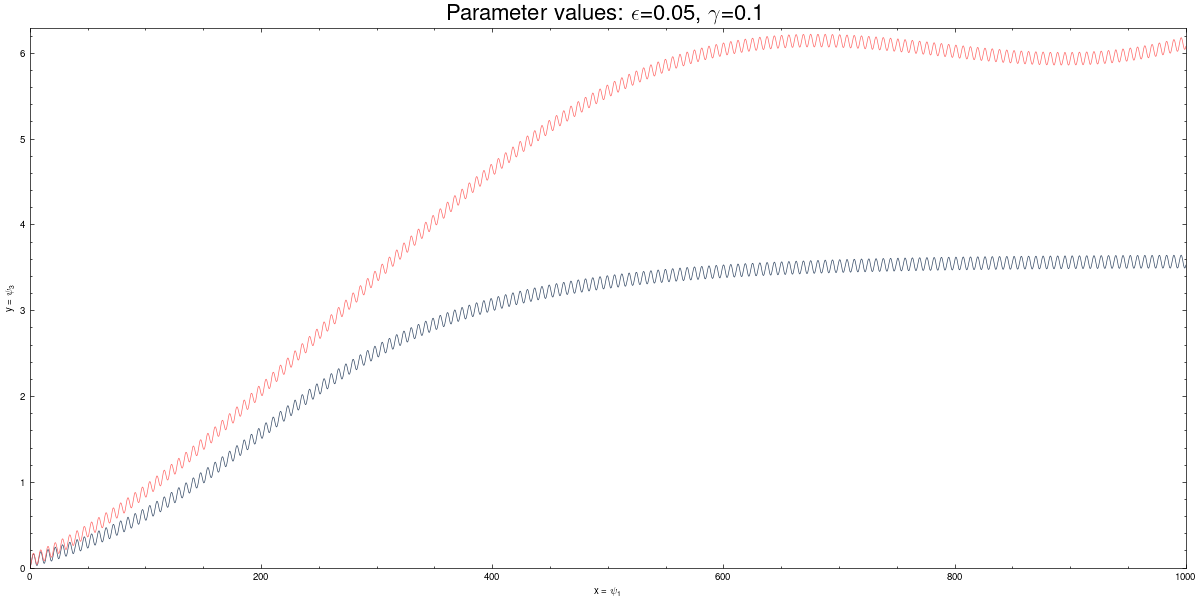

In [ ]:
plt.figure(figsize=(12, 6), layout='constrained')

plt.plot(ds.t_sol[::500], 
            ds.x_sol[0][::500], 
            c = PLOT_COLORS[0], lw=0.5)

plt.plot(ds.t_sol[::500],
         y0(ds.t_sol[::500])+eps*y1(ds.t_sol[::500]),
         c = PLOT_COLORS[1], lw=0.5)

plt.xlabel(r"x = $\psi_1$")
plt.ylabel(r"y = $\psi_3$")
plt.title(rf"Parameter values: $\epsilon$={epsc}, $\gamma$={gamma}")

plt.xlim(0, 1000)
plt.ylim(0, 2*np.pi)

plt.show()

In [12]:
def poincare_map(x, y, cycle):
    p_map = []
    N = 1
    for i in range(len(x)):
        if x[i] > N * cycle:
            p_map.append(y[i])
            N += 1
    
    return np.asarray(p_map)

In [13]:
y_map = poincare_map(ds.t_sol, ds.x_sol[0], 2*np.pi)
y_map_asymp = poincare_map(ds.t_sol, y0(ds.t_sol)+eps*y1(ds.t_sol), 2*np.pi)

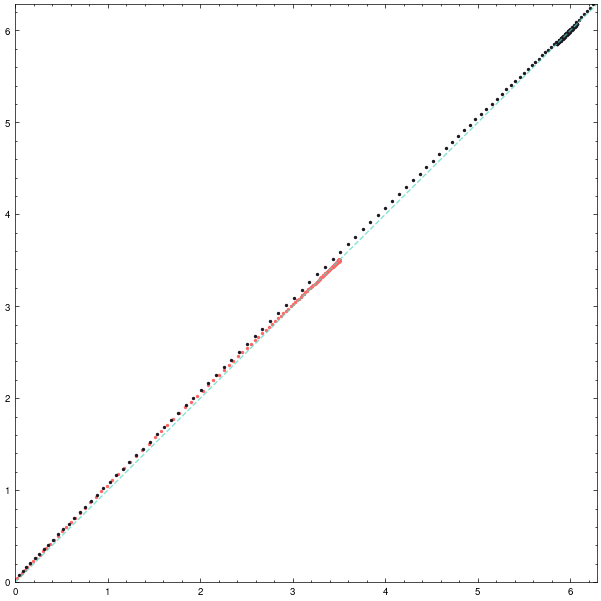

In [15]:
plt.figure(figsize=(6, 6), layout="constrained")

bisect = np.linspace(0, 2*np.pi, 1000)

plt.plot(bisect, bisect, '--', c = PLOT_COLORS[3], alpha=0.7, lw = 1)

plt.scatter(y_map[:-1],
            y_map[1:], s = 2, c = PLOT_COLORS[1])

plt.scatter(y_map_asymp[:-1],
            y_map_asymp[1:], s = 2, c = PLOT_COLORS[2])

plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)

plt.show()